In [170]:
# ██▓███   ▄▄▄       ██▀███   ▄████▄   ██▓ ▄▄▄       ██▓    
# ▓██░  ██▒▒████▄    ▓██ ▒ ██▒▒██▀ ▀█  ▓██▒▒████▄    ▓██▒    
# ▓██░ ██▓▒▒██  ▀█▄  ▓██ ░▄█ ▒▒▓█    ▄ ▒██▒▒██  ▀█▄  ▒██░    
# ▒██▄█▓▒ ▒░██▄▄▄▄██ ▒██▀▀█▄  ▒▓▓▄ ▄██▒░██░░██▄▄▄▄██ ▒██░    
# ▒██▒ ░  ░ ▓█   ▓██▒░██▓ ▒██▒▒ ▓███▀ ░░██░ ▓█   ▓██▒░██████▒
# ▒▓▒░ ░  ░ ▒▒   ▓▒█░░ ▒▓ ░▒▓░░ ░▒ ▒  ░░▓   ▒▒   ▓▒█░░ ▒░▓  ░
# ░▒ ░       ▒   ▒▒ ░  ░▒ ░ ▒░  ░  ▒    ▒ ░  ▒   ▒▒ ░░ ░ ▒  ░
# ░░         ░   ▒     ░░   ░ ░         ▒ ░  ░   ▒     ░ ░   
#               ░  ░   ░     ░ ░       ░        ░  ░    ░  ░
#  

In [172]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import integrate
from scipy.integrate import odeint

# Punto 1 (Multipaso)

In [173]:
def f(y,x):
    return x + 2*y 
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.
N = 100
t = np.linspace(0.,4.,N)
y = 0

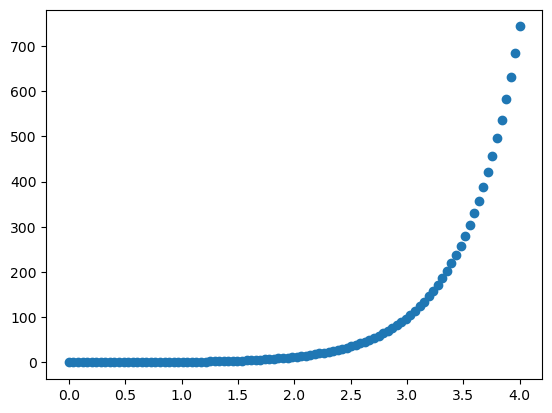

In [174]:
yext = Solucion(t)
plt.scatter(t,yext)

In [175]:
def GetAdams(f,r,t):
    
    h = t[1] - t[0]
    vx = np.zeros_like(t)
    vx[0] = r
    
    for i in range(0,4):
        actual = vx[i]
        k1 = f(actual,t[i])
        k2 = f(actual+h*k1/2,t[i]+h/2)
        k3 = f(actual+h*k2/2,t[i]+h/2)
        k4 = f(actual+h*k3,t[i]+h) 
        vx[i+1] = vx[i]+(h/6)*(k1+2*k2+2*k3+k4)  
    vxc = np.copy(vx)
    

    for i in range(5,len(t)):
        
        #Bashford
        
        presente = vx[i-1]
        pasado = vx[i-2]
        pasado_2 = vx[i-3]
        pasado_3 = vx[i-4]
        pasado_4 = vx[i-5]
        
        #valores
        k1 = f(presente, t[i-1])
        k2 = f(pasado, t[i-2])
        k3 = f( pasado_2, t[i-3])
        k4 = f(pasado_3, t[i-4])
        k5 = f(pasado_4, t[i-5])
        
        
        vx[i] = vx[i-1] + h*(1901*k1 - 2774*k2 + 2616*k3 -1274*k4+251*k5)/720 
        
        
 
        #future with my pana Multon
        
        future = vx[i]
        k6 = f(future,t[i])
        
        vxc[i] = vxc[i-1] + (h/1440)*(1427*k1 -798*k2 +482*k3 + -173*k4 +27*k5+475*k6) 
        
    
    return vx, vxc

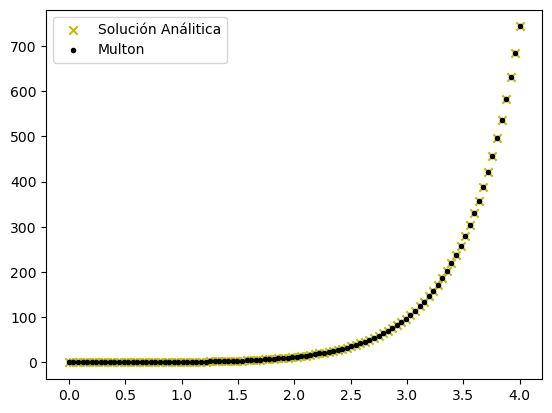

In [176]:
sol2 = GetAdams(f,y, t)

plt.scatter(t,yext, marker='x', color='y',label = "Solución Análitica")
plt.scatter(t,sol2[1],marker='.',color='k', label = "Multon")

plt.legend()


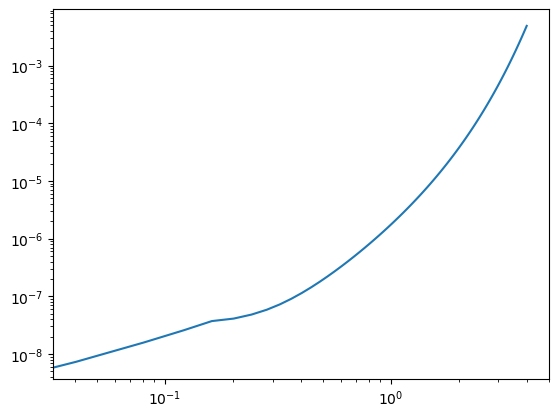

In [177]:
Diferencia = abs(sol2[1]-yext)
plt.plot(t, Diferencia)
plt.xscale('log')  # Establecer escala logarítmica en el eje x
plt.yscale('log') 


Para encontrar los puntos n =1,2,3,4. Realizmaos Rugen Kutta de orden 4. Dado que la ecuación predictora y correctora necesita 5 valores realizamos 5 veces Runge-Kutta 5 veces. 

In [178]:
#   ,-.       _,---._ __  / \
#  /  )    .-'       `./ /   \
# (  (   ,'            `/    /|
#  \  `-"             \'\   / |
#  `.              ,  \ \ /  |
#    /`.          ,'-`----Y   |
#   (            ;        |   '
#   |  ,-.    ,-'         |  /
#   |  | (   |   Esteban  | /
#   )  |  \  `.___________|/
#   

# Punto 2 (Adaptativo)

a) A decae en B, por lo tanto:

$\frac{dN_A}{dt} = -\lambda_A N_A$

La cantidad de particulas en B aumenta con el decaimiento de A en B, pero disminuye con el decaimiento de B en C, por lo tanto:

$\frac{dN_B}{dt} = -\lambda_b N_B + \lambda_A N_A$

y C al ser estable no decae, pero su cantidad si aumenta con el decaimiento de B en C.

$\frac{dN_C}{dt} = \lambda_B N_B$

b)


Text(0.5, 1.0, 'Solución con Odeint')

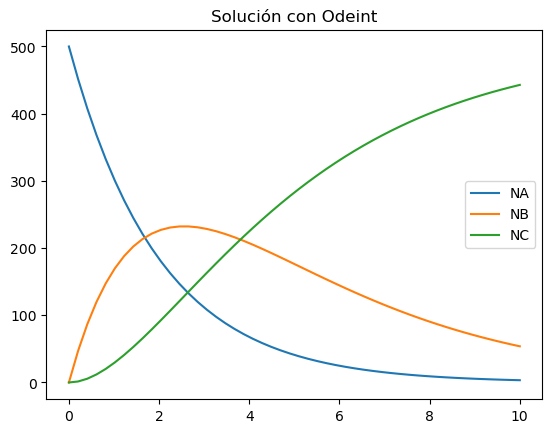

In [181]:
la = 0.5
lb = 0.3

def system(r,t):

    na, nb, nc = r

    dnadt = -la * na
    dnbdt = la*na - lb*nb
    dncdt = lb*nb

    return np.array([dnadt,dnbdt,dncdt])



t = np.linspace(0, 10, 50)
r0 = [500,0,0]

sol = odeint(system, r0, t)

plt.figure(dpi=100)
plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])
plt.plot(t, sol[:,2])
plt.legend(["NA", "NB", "NC"])
plt.title("Solución con Odeint")

C)

In [182]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1], r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1], r[2] + 0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

def adaptativo(f,r0,t,e=1e-4):

    h = t[1]-t[0]
    tf = t[-1]
    ti = t[0]

    r = r0

    Time = np.array([ti])
    Vector = r

    Steps = np.array([h])

    while ti < tf:
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)

        rt = Increment(f,r,t,2*h)

        error = np.linalg.norm(r2-rt)

        if error < e:
            ti += 2*h
            r = rt

            Steps = np.append(Steps,h)
            Time = np.append(Time,ti)
            Vector = np.vstack((Vector,r))

        q = 0.85 * (e/error)**(1/4)
        h = h*q

        
    return Time, Vector, Steps

time, vector, steps = adaptativo(system, r0, t)

D)

In [183]:
print("La cantidad total de pasos fue de: {}".format(len(steps)))

La cantidad total de pasos fue de: 38


E)

Text(0.5, 1.0, 'Solución con ALgoritmo Fehlberg')

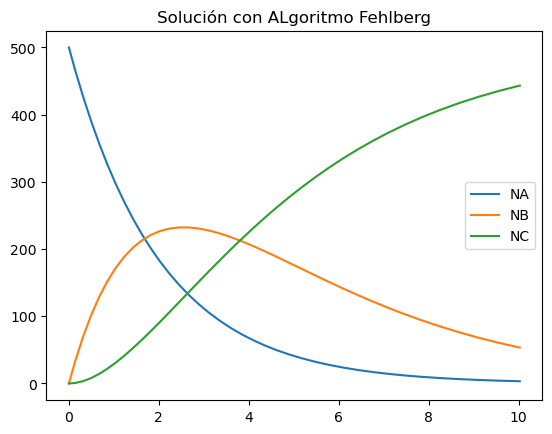

In [184]:
plt.figure(dpi=100)
plt.plot(time, vector[:,0])
plt.plot(time, vector[:,1])
plt.plot(time, vector[:,2])
plt.legend(["NA", "NB", "NC"])
plt.title("Solución con ALgoritmo Fehlberg")

Las gráficas son exactamente iguales, por lo tanto el algoritmo funciona bastante bien.

F)

In [185]:
bmax = np.max(vector[:,1])
bmax_ind = np.where(vector[:,1] == bmax)[0][0]
bmax_time = round(time[bmax_ind],3)
bmax = round(bmax,3)

print("La cantidad de Particulas B es máxima en t = {} con {} partículas.".format(bmax_time, bmax))

La cantidad de Particulas B es máxima en t = 2.452 con 232.192 partículas.


G)

In [186]:
cinb = vector[:,2][bmax_ind]
cinb = round(cinb,3)


print("La cantidad de particulas B es máxima en t = {}. En ese instante NB = {} y NC = {}".format(bmax_time, bmax, cinb))

La cantidad de particulas B es máxima en t = 2.452. En ese instante NB = 232.192 y NC = 121.078


In [179]:
#                                               `.   \
#                                                 \   \
#                                                   .   \
#                                                   :   .
#                       Edward                       |    .
#                                                    |    :
#                                                    |    |
# ..._  ___                                         |    |
# `."".`''''""--..___                              |    |
# ,-\  \             ""-...__         _____________/    |
# / ` " '                    `""""""""                  .
# \                                                      L
# (>                                                      \
# /                                                         \
# \_    ___..---.                                            L
#   `--'         '.                                           \
#                  .                                           \_
#                 _/`.                                           `.._
#              .'     -.                                             `.
#             /     __.-Y     /''''''-...___,...--------.._            |
#            /   _."    |    /                ' .      \   '---..._    |
#           /   /      /    /                _,. '    ,/           |   |
#          /   /      /    /              /''     _,-'            _|   |
#          \_,'     _.'   /               `-----''               /     |
#                  '     /                                    `...-'
#    